In [94]:
import pandas as pd
import numpy as np

data=pd.read_csv('C:/Users/PROMIT/Desktop/DFT/music.csv')


In [95]:
data.head()

,filename,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,blues.00000.0.wav,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.63090,1972.744388,117335.77160,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,blues.00000.1.wav,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.69087,2010.051501,65671.87567,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,blues.00000.2.wav,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.43760,2084.565132,75124.92172,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,blues.00000.3.wav,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.28450,1960.039988,82913.63927,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,blues.00000.4.wav,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.26765,1948.503884,60204.02027,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues


In [96]:
#Checking missing values in the dataset
data.isnull().sum()


filename                   0
length                     0
chroma_stft_mean           0
chroma_stft_var            0
rms_mean                   0
rms_var                    0
spectral_centroid_mean     0
spectral_centroid_var      0
spectral_bandwidth_mean    0
spectral_bandwidth_var     0
rolloff_mean               0
rolloff_var                0
zero_crossing_rate_mean    0
zero_crossing_rate_var     0
harmony_mean               0
harmony_var                0
perceptr_mean              0
perceptr_var               0
tempo                      0
mfcc1_mean                 0
mfcc1_var                  0
mfcc2_mean                 0
mfcc2_var                  0
mfcc3_mean                 0
mfcc3_var                  0
mfcc4_mean                 0
mfcc4_var                  0
mfcc5_mean                 0
mfcc5_var                  0
mfcc6_mean                 0
mfcc6_var                  0
mfcc7_mean                 0
mfcc7_var                  0
mfcc8_mean                 0
mfcc8_var     

In [97]:
#Removing missing values(if any)
data=data.dropna(axis=0,how='any')

In [98]:
#Exctracing the feature vector
X=data.drop(columns="filename",axis=1)
X=X.drop(columns="length",axis=1)
X=X.drop(columns="label",axis=1)


In [99]:
#Exctracting the target vector
Y=data["label"]

In [100]:
#One-hot encoding the target variables

Y_labeled=pd.get_dummies(Y)

Y_labeled.head()


,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
0,1,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0


In [101]:
#Creating dataframe to store labels
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler()
from sklearn.model_selection import train_test_split

#Splitting train and test datasets
X_train,X_test,Y_train,Y_test=train_test_split(X,Y_labeled,test_size=0.2)

In [102]:
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)


In [103]:
Y_train.head()

,blues,classical,country,disco,hiphop,jazz,metal,pop,reggae,rock
2903,0,0,1,0,0,0,0,0,0,0
4132,0,0,0,0,1,0,0,0,0,0
5819,0,0,0,0,0,1,0,0,0,0
8471,0,0,0,0,0,0,0,0,1,0
5915,0,0,0,0,0,1,0,0,0,0


# Specifying model architecture:

In [104]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dropout
model=Sequential()
model=Sequential([
                  
                  Dense(units=128,input_shape=(57,),activation='relu'),
                  Dropout(0.2),
                  Dense(units=64,activation='relu'),
                  Dropout(0.2),
                  Dense(units=32,activation='relu'),
                  Dense(units=16,activation='relu'),
                  Dense(units=10,activation='softmax')
])


In [105]:
model.summary()


Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               7424      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 10)              

In [106]:
#Compiling the model
model.compile(optimizer=Adam(learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy'])



In [107]:
#Fitting the model on training dataset
history=model.fit(x=X_train,y=Y_train,validation_split=0.2,batch_size=20,epochs=500,shuffle=True,verbose=2)


Epoch 1/500
320/320 - 0s - loss: 2.2916 - accuracy: 0.1552 - val_loss: 2.2542 - val_accuracy: 0.2389
Epoch 2/500
320/320 - 0s - loss: 2.2101 - accuracy: 0.2290 - val_loss: 2.1133 - val_accuracy: 0.2702
Epoch 3/500
320/320 - 0s - loss: 2.0516 - accuracy: 0.2766 - val_loss: 1.9355 - val_accuracy: 0.3114
Epoch 4/500
320/320 - 0s - loss: 1.9185 - accuracy: 0.3000 - val_loss: 1.8089 - val_accuracy: 0.3265
Epoch 5/500
320/320 - 0s - loss: 1.8103 - accuracy: 0.3266 - val_loss: 1.6991 - val_accuracy: 0.3490
Epoch 6/500
320/320 - 0s - loss: 1.7274 - accuracy: 0.3513 - val_loss: 1.6172 - val_accuracy: 0.3746
Epoch 7/500
320/320 - 0s - loss: 1.6704 - accuracy: 0.3745 - val_loss: 1.5628 - val_accuracy: 0.4021
Epoch 8/500
320/320 - 0s - loss: 1.6214 - accuracy: 0.3940 - val_loss: 1.5067 - val_accuracy: 0.4121
Epoch 9/500
320/320 - 0s - loss: 1.5821 - accuracy: 0.3997 - val_loss: 1.4675 - val_accuracy: 0.4465
Epoch 10/500
320/320 - 0s - loss: 1.5385 - accuracy: 0.4104 - val_loss: 1.4233 - val_accura

In [108]:
from plot_keras_history import show_history, plot_history
import matplotlib.pyplot as plt

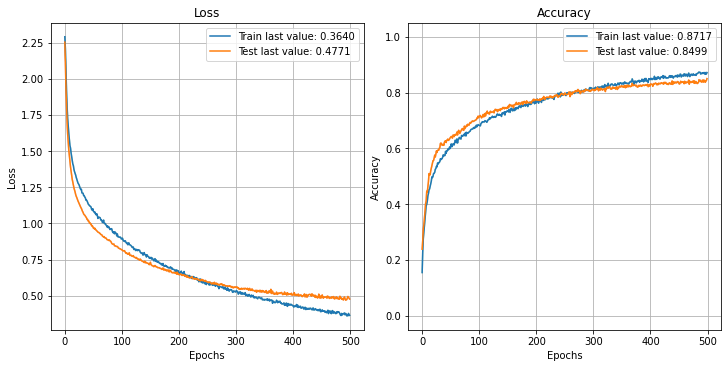

In [109]:
plot_history(history)
plt.show()

In [110]:
#Testing on test dataset

evaluation=model.evaluate(x=X_test,y=Y_test,batch_size=20,verbose=2)

100/100 - 0s - loss: 0.4661 - accuracy: 0.8539


In [111]:
accuracy=evaluation[1]*100

In [112]:
print('The accuracy of the ANN model is', accuracy,'%')

The accuracy of the ANN model is 85.38538813591003 %


In [64]:
pred1=model.predict(X_test[0:2])[1]

In [65]:
np.argmax(pred1)

6

In [113]:
#Saving our model:
model.save('music_model_final.h5')

In [127]:
from tensorflow.keras.models import load_model

In [128]:
new_model=load_model('music_model_final.h5')

In [129]:
new_model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_21 (Dense)             (None, 128)               7424      
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_22 (Dense)             (None, 64)                8256      
_________________________________________________________________
dropout_5 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_23 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_24 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_25 (Dense)             (None, 10)              

In [130]:
new_model.get_weights()

[array([[ 0.07449476, -0.08308847, -0.10720991, ..., -0.2673073 ,
          0.1172922 , -0.06653504],
        [-0.22526596,  0.05894927,  0.16602129, ...,  0.21858275,
         -0.00737367,  0.06033309],
        [ 0.09433553, -0.07329758,  0.06765842, ..., -0.11509082,
         -0.15545996, -0.03079602],
        ...,
        [-0.00685936, -0.03327563,  0.2965985 , ...,  0.14066343,
         -0.00998532,  0.00247324],
        [ 0.20086204,  0.10635127,  0.03531587, ..., -0.01455506,
          0.22894393, -0.08759648],
        [ 0.0770381 , -0.02807948,  0.21688476, ...,  0.00579517,
         -0.1759878 , -0.07918331]], dtype=float32),
 array([-0.07420682, -0.00665282,  0.06534712, -0.0406188 , -0.04308464,
        -0.07272145, -0.01649106, -0.08597067,  0.06497114,  0.        ,
         0.04513612, -0.05468908,  0.02596799,  0.02173766,  0.03819625,
        -0.03782869,  0.        ,  0.02749102, -0.01180965, -0.00827754,
        -0.03397377, -0.06142983,  0.02968794, -0.0613606 ,  0.036

In [132]:
new_model.predict(X_test[1:5])[0]

array([8.8913557e-06, 2.2254074e-10, 1.2830261e-05, 9.6881479e-01,
       2.2732550e-02, 1.7540657e-08, 6.2638381e-04, 1.1578574e-04,
       4.3076240e-03, 3.3809827e-03], dtype=float32)